# **Bank Loan Approval Prediction**

## Life cycle of Machine learning Project

- Understanding the Problem Statement     
- Data Collection     
- Data Checks to perform     
- Exploratory data analysis     
- Data Pre-Processing     
- Model Training     
- Choose best model     

## (1) Problem Statement

   Banks receive many loan applications every day.    
   But not **every person qualifies for a loan**.

   So the goal is:

- To build a Machine Learning model that predicts whether a customer will get loan approval or not, based on their personal and financial details.

## (2) Data Collection 

- Dataset Source - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
- The data consists of 13 columns and 4269 rows.

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame


In [2]:
df = pd.read_csv("D:\Loan_Approval_Prediction\LoanApproval_Data\loan_approval_prediction.csv")

Show Top 5 Records


In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Shape of the dataset


In [4]:
df.shape

(4269, 13)

## 2.2 Dataset Information

| Column name                                            | Meaning / Description                                                        |
| ------------------------------------------------------ | ---------------------------------------------------------------------------- |
| `loan_id`                                              | Unique ID for each loan application                                          |
| `no_of_dependents`                                     | Number of dependents (people dependent on applicant)                         |
| `education`                                            | Education level of applicant (e.g. graduate / not graduate)                  |
| `self_employed`                                        | Whether applicant is self-employed or not                                    |
| `income_annum`                                         | Annual income of the applicant                                               |
| `loan_amount`                                          | Amount of loan requested/required by applicant                               |
| `loan_term`                                            | Requested loan term / tenure (time to repay)                                 |
| `cibil_score`                                          | Credit score of the applicant — measure of creditworthiness                  |
| `residential_assets_value`                             | Value of residential assets owned by applicant                               |
| `commercial_assets_value`                              | Value of any commercial assets owned (if any) by applicant                   |
| `luxury_assets_value`                                  | Value of luxury assets owned by applicant (if any)                           |
| `bank_asset_value`                                     | Value/assets in bank (bank balance / holdings) of applicant                  |
| `loan_status`                                          | Target variable: whether loan was approved or rejected (Approved / Rejected) |

## 3. Data Checks to perform 

### 3.1 Check dataset columns

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

- In our column names, there are some extra spaces at the beginning.
### We are going to remove those spaces so that while fetching the columns from the dataset, we do not face any kind of difficulty.

### 3.2 Removing extra spaces from the column names.

In [6]:
for i in list(df.columns)[1:]:
    df.rename(columns={i:i[1:]},inplace=True)
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

- **Problem Solved**

### 3.3 Check dataset information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


- There are 10 integer columns and 3 object columns. We can easily see that there are no null values in the dataset.

### 3.4 Check missing value, null value

In [8]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### 3.5 Check Duplicates

In [9]:
df[df.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


- There are no duplicate records present in the dataset.

### 3.6 Check the number of unique values of each column

#### - 3.6.1 for categorical columns

In [10]:
df.select_dtypes(include='object').nunique()

education        2
self_employed    2
loan_status      2
dtype: int64

- There are three categorical columns and each has 2 unique values.

#### - 3.6.2 for Integer columns

In [11]:
df.select_dtypes(include='int').nunique()

loan_id                     4269
no_of_dependents               6
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
dtype: int64

- There are 6 types of dependents and 10 types of loan term values in the dataset.
- **The loan_id column is completely unique, so we should remove it from the dataset.**

### 3.7 Remove loan_id column

In [12]:
df.drop('loan_id',axis=1,inplace=True)

### 3.8 Check statistics of data set

In [13]:
df.describe(include='int')

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


- A maximum of 5 family members are dependent on the customer, and the bank provides a loan for up to 20 months based on the dataset.

### 3.9 Check the unique value of the categorical columns

In [14]:
for i in list(df.select_dtypes(include='object'))+['no_of_dependents','loan_term']:
    print(f"• Unique value of {i} column are : {df[i].unique()}")

• Unique value of education column are : [' Graduate' ' Not Graduate']
• Unique value of self_employed column are : [' No' ' Yes']
• Unique value of loan_status column are : [' Approved' ' Rejected']
• Unique value of no_of_dependents column are : [2 0 3 5 4 1]
• Unique value of loan_term column are : [12  8 20 10  4  2 18 16 14  6]


- In our education, self_employed, and loan_status column values, there are some extra spaces at the beginning.

### We are going to remove these spaces so that while analyzing or processing the data, we do not face any issues.

### 3.10 Removing extra spaces from the values of the columns

In [15]:
for i in list(df.select_dtypes(include='object')):
    for j in list(df[i].unique()):
        df[i] = df[i].replace(j,j[1:])

for i in list(df.select_dtypes(include='object')):
    print(f"• Unique value of {i} column are : {df[i].unique()}")

• Unique value of education column are : ['Graduate' 'Not Graduate']
• Unique value of self_employed column are : ['No' 'Yes']
• Unique value of loan_status column are : ['Approved' 'Rejected']


- **Problem Solved**

### 3.11 Check the head, tail and sample

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [17]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [18]:
df.sample(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4228,1,Graduate,Yes,3200000,9300000,6,483,6700000,1900000,7800000,3600000,Rejected
2372,2,Graduate,No,8100000,20800000,18,778,4100000,15500000,16700000,10600000,Approved
2646,2,Not Graduate,No,6600000,22900000,16,543,2500000,11000000,26300000,8500000,Rejected
987,5,Graduate,No,9400000,25800000,14,625,28200000,15400000,30800000,11100000,Approved
4193,5,Graduate,Yes,8900000,19100000,20,329,13300000,11400000,29500000,10000000,Rejected


## 4. Univariate Analysis

### 4.1 Create a list of **Numeric Columns** and **Categorical Columns**

In [19]:
numeric_col = list(df.select_dtypes(include='int').columns)
categorical_col = list(df.select_dtypes(include='object'))
print(f"Numeric Columns : {numeric_col}")
print(f"Categorical Columns :{categorical_col}")

Numeric Columns : ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Columns :['education', 'self_employed', 'loan_status']


- Dataset have ***3 categorical columns*** and ***10 Numerical Columns***

### 4.2 Create a ***Pie Chart*** and ***Bar Chart*** for the categorical columns.

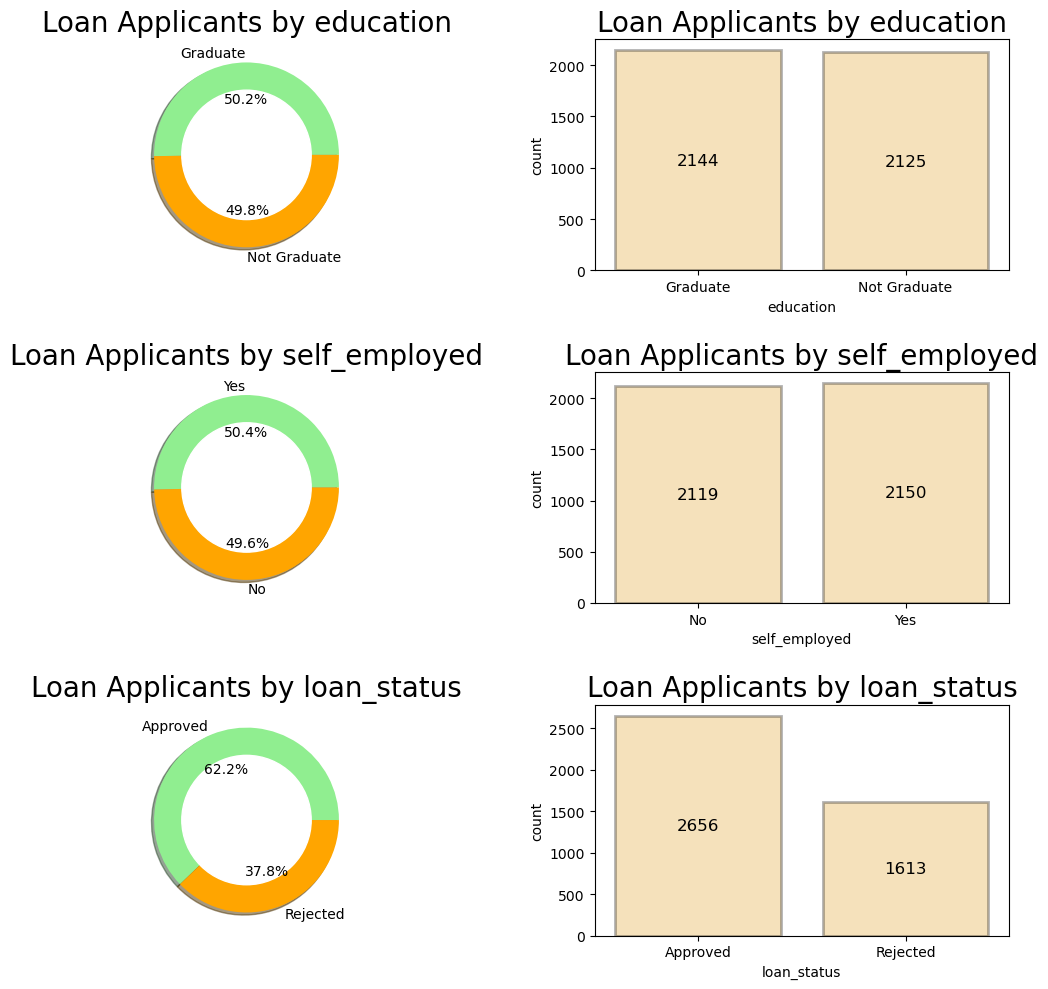

In [20]:
count=1
plt.figure(figsize=(10,10))
for col in categorical_col:
    values_count = df[col].value_counts()
    plt.subplot(len(categorical_col),2,count)
    
    plt.pie(values_count.values,labels=values_count.index, autopct='%1.1f%%',shadow=True,colors=['lightgreen','orange'])
    circle = plt.Circle((0,0), 0.70, color='white')
    plt.gca().add_artist(circle)
    plt.title(f"Loan Applicants by {col}",fontsize=20)
    count+=1
    plt.subplot(len(categorical_col),2,count)
    ax = sns.countplot(x=col,data=df,color='orange',alpha=0.3,edgecolor='black',linewidth=2)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height/2, int(height), ha='center', va='center', color='black', fontsize=12)

    plt.title(f"Loan Applicants by {col}",fontsize=20)
    count+=1
plt.tight_layout(w_pad=10, h_pad=2)
plt.show()


#### Education  
- ***50.2%*** of applicants are graduates, and ***49.8%*** of applicants are not graduates.
#### Self Employed 
- ***50.4%*** of applicants are self employed, and ***49.6%*** of applicants are not self employed. 
#### Loan Status  
- ***62.2%*** of applicants are Approved, and ***37.8%*** of applicants are Rejected.

### 4.3 Count plot of no_of_dependents and loan_term

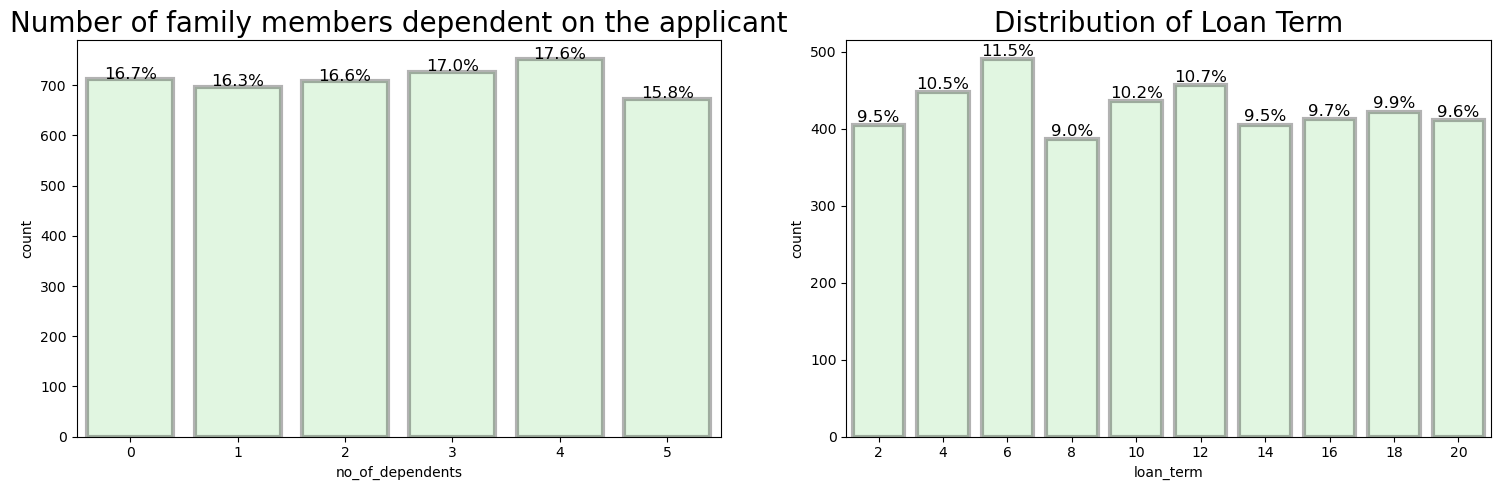

In [21]:
count = 1
plt.figure(figsize=(15,5))
for col in ['no_of_dependents','loan_term']:
    plt.subplot(1,2,count)
    ax=sns.countplot(x=col,data=df,color='lightgreen',alpha=0.3,edgecolor='black',linewidth=3)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width()/2.,height+10.0,f'{percent:.1f}%',ha='center', va='center',color='black',fontsize=12)
    if count == 1:
        plt.title("Number of family members dependent on the applicant",fontsize=20)
    else:
        plt.title("Distribution of Loan Term",fontsize=20)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

#### no_of_dependents
- Most applicants financially support ***3–4 family members***, indicating moderate financial responsibility.
#### loan_term
- Loan terms are fairly balanced, with a slight preference for ***medium-duration loans like 6–12 months***.

### 4.4 Create a Histogram for numeric columns.

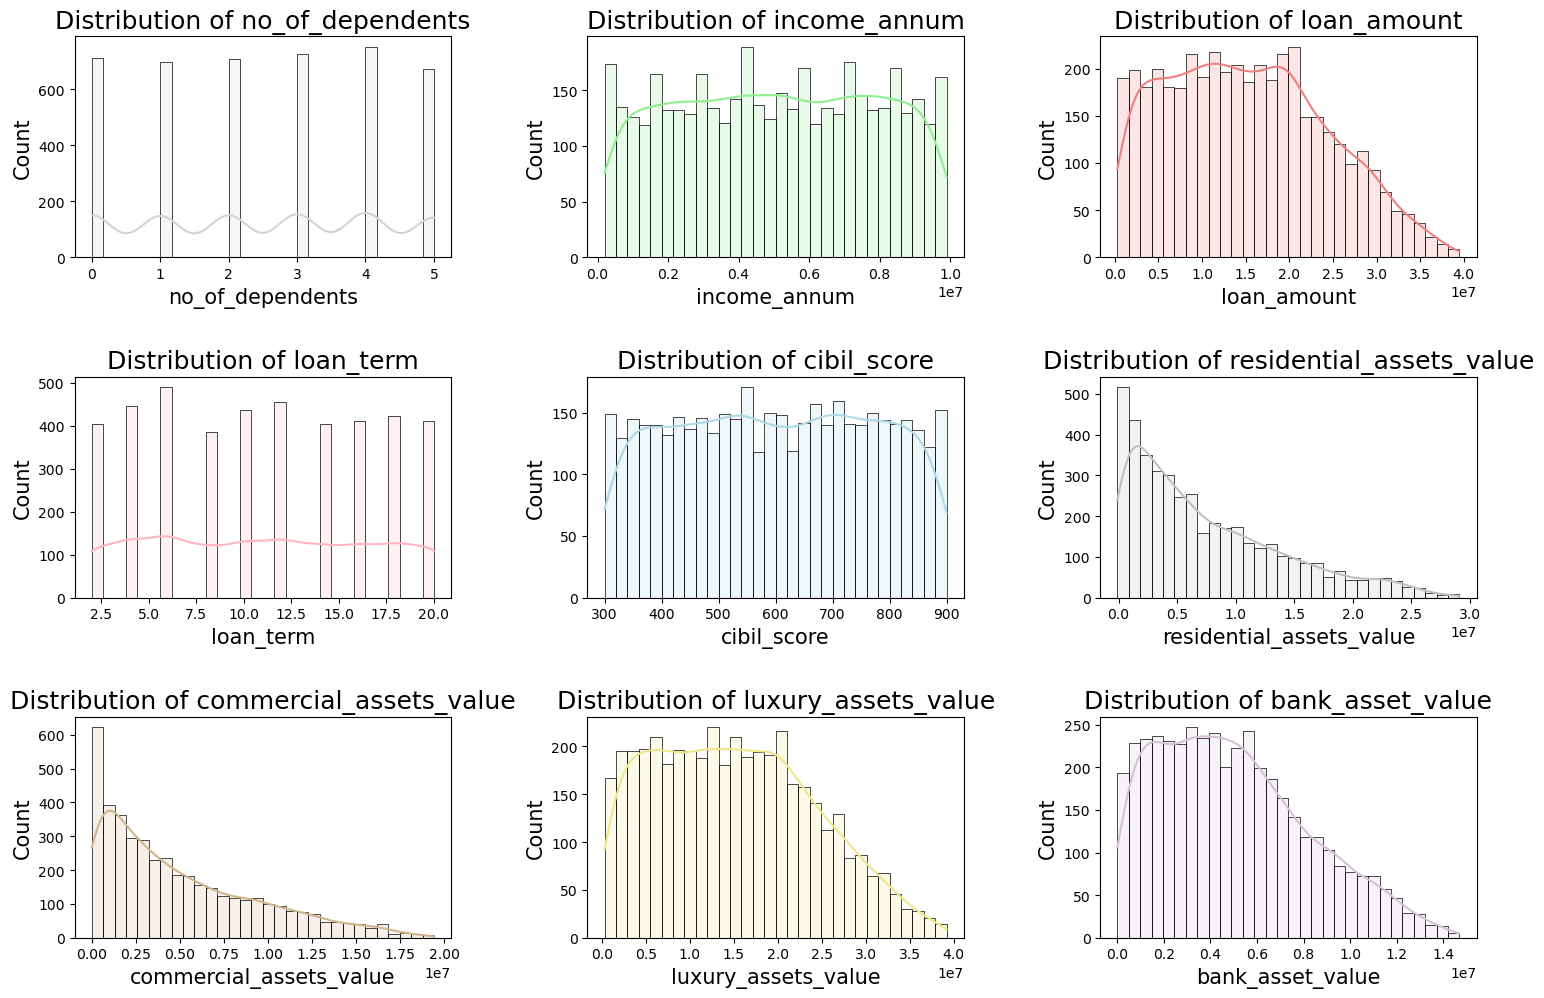

In [22]:
count=0
plt.figure(figsize=(15,30))
for col in numeric_col:
    colors =  ['lightgrey','lightgreen','lightcoral','lightpink','lightblue','silver','tan','khaki','thistle']
    plt.subplot(len(numeric_col),3,count+1)
    sns.histplot(x=col,data=df,bins=30,kde=True,color=colors[count],edgecolor='black',linewidth=0.5,alpha=0.2)
    plt.title(f"Distribution of {col}",fontsize=18)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()
    

#### no_of_dependents

- Most applicants have between 1–3 dependents, resembling a Right-Skewed Discrete Distribution (Poisson-like).

#### income_annum

- Income is widely spread but denser in mid-range values, showing a Slight Right-Skewed Continuous Distribution (Log-Normal-like).

#### loan_amount

- Loan amounts are concentrated on lower values and decrease gradually toward higher amounts, indicating a Right-Skewed Distribution (Exponential-like).

#### loan_term

- Loan term values remain evenly distributed with mild skewness, nearly forming a Uniform-like Distribution.

#### cibil_score

- CIBIL score is concentrated in mid-high values, resembling a Near-Normal Distribution but slightly right-leaning.

#### residential_assets_value

- Majority of applicants possess lower-value assets, forming a Strong Right-Skewed Distribution (Exponential-like).

#### commercial_assets_value

- Commercial assets heavily concentrate toward lower amounts, also showing a Strong Right-Skewed (Exponential-like) pattern.

#### luxury_assets_value

- Luxury assets peak around the middle ranges and taper off, forming a Moderately Right-Skewed Distribution.

#### bank_asset_value

- Bank asset value decreases as the value increases, clearly forming a Right-Skewed (Exponential-like) distribution.

### 4.5 Create a Box Plot to visualize outliers and find outliers

#### 4.5.1 Visualize Outliers

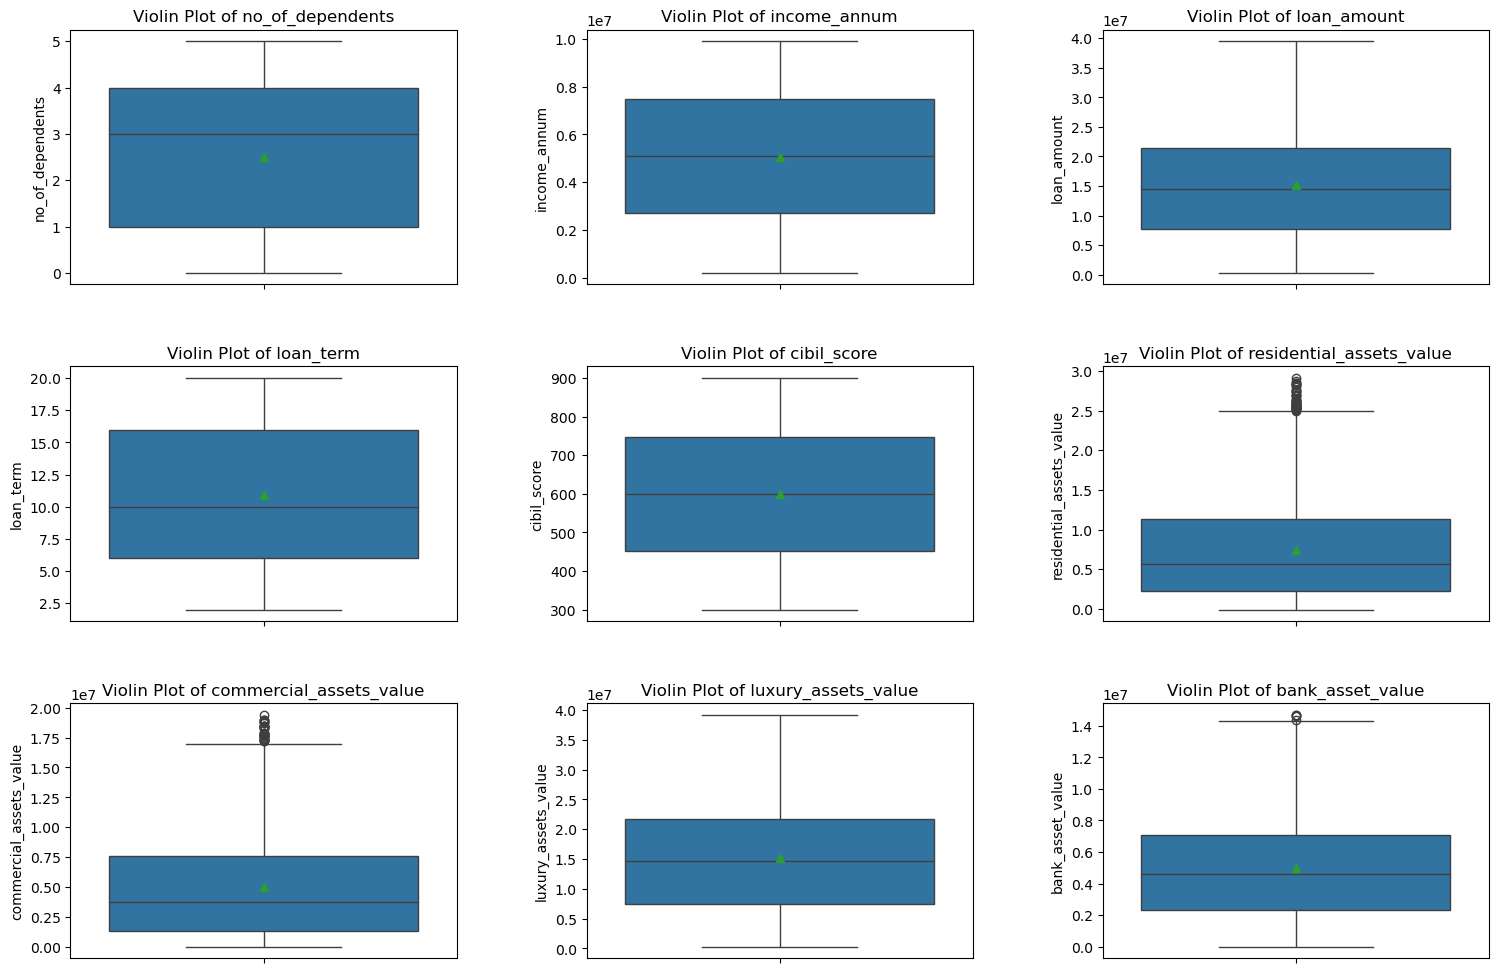

In [23]:
count=0
plt.figure(figsize=(15,30))
for col in numeric_col:
    plt.subplot(len(numeric_col),3,count+1)
    sns.boxplot(y=col,data=df,showmeans=True)
    plt.title(f"Violin Plot of {col}")
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()

#### 4.5.2 Find Outliers

In [24]:
Outliers_dict = {}
for col in numeric_col:
    q1,q3 = df[col].quantile([0.25,0.75])
    IQR = q3 - q1 
    lower_fence = q1 - 1.5 * IQR 
    upper_fence = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)][col]
    Outliers_dict[col] = outliers.to_list()
for key,values in Outliers_dict.items():
    print(f"• {key} : {values}")
    print(f"Length of {key} : {len(values)}")

• no_of_dependents : []
Length of no_of_dependents : 0
• income_annum : []
Length of income_annum : 0
• loan_amount : []
Length of loan_amount : 0
• loan_term : []
Length of loan_term : 0
• cibil_score : []
Length of cibil_score : 0
• residential_assets_value : [25500000, 25900000, 26800000, 25500000, 25600000, 25400000, 28300000, 26300000, 27600000, 28700000, 25300000, 25800000, 25500000, 25300000, 28200000, 25200000, 25800000, 25700000, 25500000, 27000000, 28500000, 26300000, 28400000, 27000000, 25900000, 28500000, 26600000, 26200000, 28000000, 25800000, 25500000, 26900000, 25200000, 27600000, 25300000, 26100000, 29100000, 25400000, 28200000, 25100000, 25600000, 25400000, 26100000, 27500000, 25000000, 25500000, 25400000, 26200000, 25100000, 27400000, 27300000, 26200000]
Length of residential_assets_value : 52
• commercial_assets_value : [17600000, 18700000, 17500000, 19000000, 17200000, 18500000, 18800000, 17800000, 18500000, 17900000, 18300000, 17300000, 17300000, 18900000, 18400000

- We have outliers in ***residential_assets_value, commercial_assets_value, and bank_asset_value***.

- ***residential_assets_value and commercial_assets_value*** are important features because some applicants naturally have high asset values, so we keep their outliers.

- ***bank_asset_value*** has very few outliers (only 5), and ***removing them won’t significantly affect the model***, so it’s safe to remove these outliers.

## 5. Bivariate Analysis

In [25]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### 5.1 Scatter Plot of Loan Amount with Respect to Income

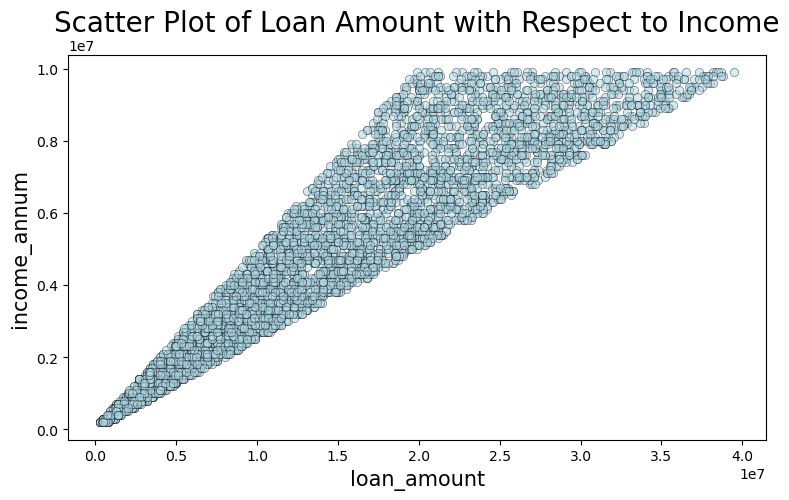

In [26]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='loan_amount',y='income_annum',data=df,color='lightblue',alpha=0.5,edgecolor='black')
plt.title("Scatter Plot of Loan Amount with Respect to Income",fontsize=20)
plt.xlabel('loan_amount',fontsize=15)
plt.ylabel('income_annum',fontsize=15)
plt.show()

- The scatter plot shows a perfect ***positive correlation***, indicating the two plotted variables are identical or ***extremely closely related***.

### 5.2 Scatter Plot of CIBIL Score vs Income Annum

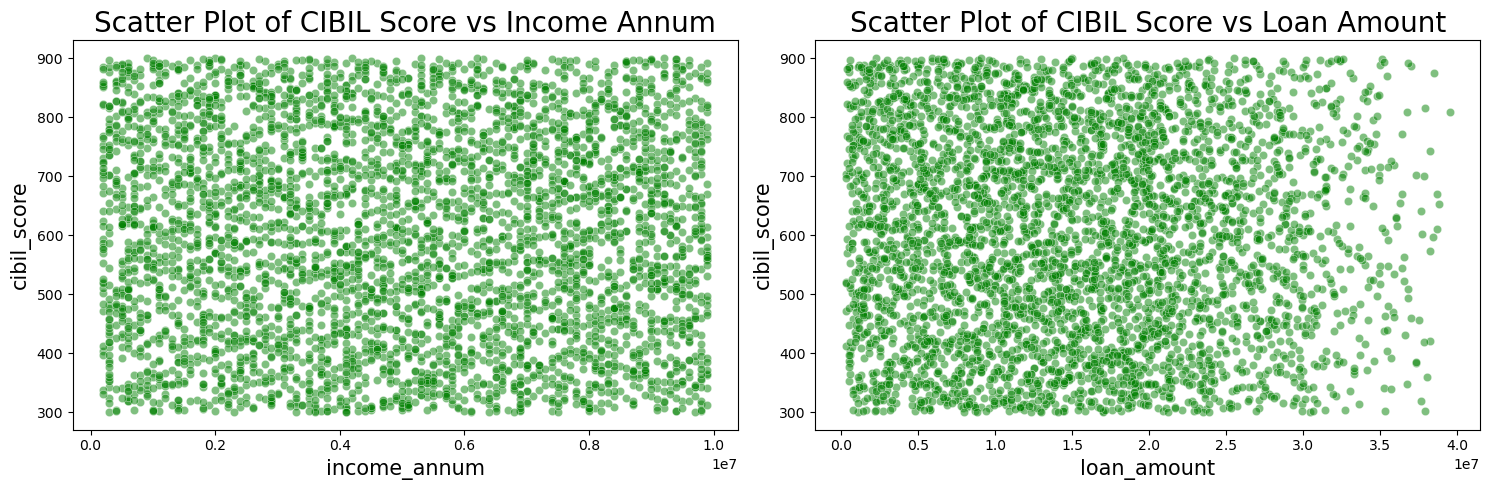

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='income_annum', y='cibil_score', data=df, color='green', alpha=0.5)
plt.title("Scatter Plot of CIBIL Score vs Income Annum",fontsize=20)
plt.ylabel('cibil_score',fontsize=15)
plt.xlabel('income_annum',fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x='loan_amount', y='cibil_score', data=df, color='green', alpha=0.5)
plt.title("Scatter Plot of CIBIL Score vs Loan Amount",fontsize=20)
plt.ylabel('cibil_score',fontsize=15)
plt.xlabel('loan_amount',fontsize=15)
plt.tight_layout()
plt.show()


- CIBIL score shows no clear correlation with either income or loan amount, indicating a scattered distribution.

### 5.3 Comparison of Asset Types Between Graduate and Non-Graduate Applicants

#### 5.3.1 Count of Asset Types Between Graduate and Non-Graduate Applicants

In [28]:
df_total_assets_education = df.groupby('education')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].sum().reset_index()
df_total_assets_education

,education,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,Graduate,16173000000,10599100000,32673100000,10735400000
1,Not Graduate,15727600000,10631300000,31901100000,10510100000


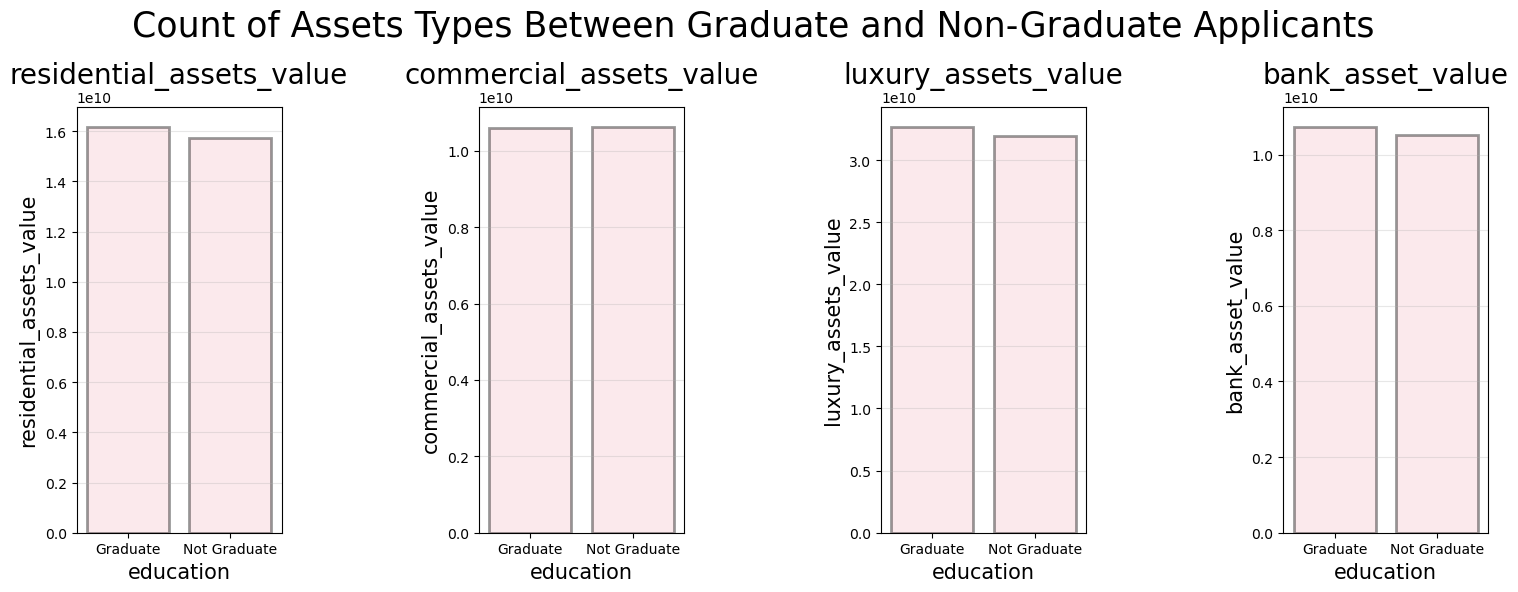

In [29]:
count=1
plt.figure(figsize=(15,6))
plt.suptitle("Count of Assets Types Between Graduate and Non-Graduate Applicants",fontsize=25)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(1,4,count)
    sns.barplot(x='education',y=col,data=df_total_assets_education,color='pink',alpha=0.4,edgecolor='black',linewidth=2)
    plt.title(f"{col}",fontsize=20)
    plt.xlabel('education',fontsize=15)
    plt.ylabel(f'{col}',fontsize=15)
    plt.grid(axis='y',alpha=0.3)
    count+=1
plt.tight_layout(w_pad=10)
plt.show()

- Graduate and Non-Graduate applicants have almost identical asset values across all asset types, with no meaningful difference between the two groups.

#### 5.3.2 Min, Max of Asset Types Between Graduate and Non-Graduate Applicants

In [30]:
df_min_max_assets_education = df.groupby('education')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].agg(['min','max']).reset_index()
df_min_max_assets_education

education residential_assets_value           commercial_assets_value  \
                                     min       max                     min   
0      Graduate                  -100000  28500000                       0   
1  Not Graduate                  -100000  29100000                       0   

            luxury_assets_value           bank_asset_value            
        max                 min       max              min       max  
0  19000000              300000  39200000                0  14600000  
1  19400000              300000  39100000                0  14700000

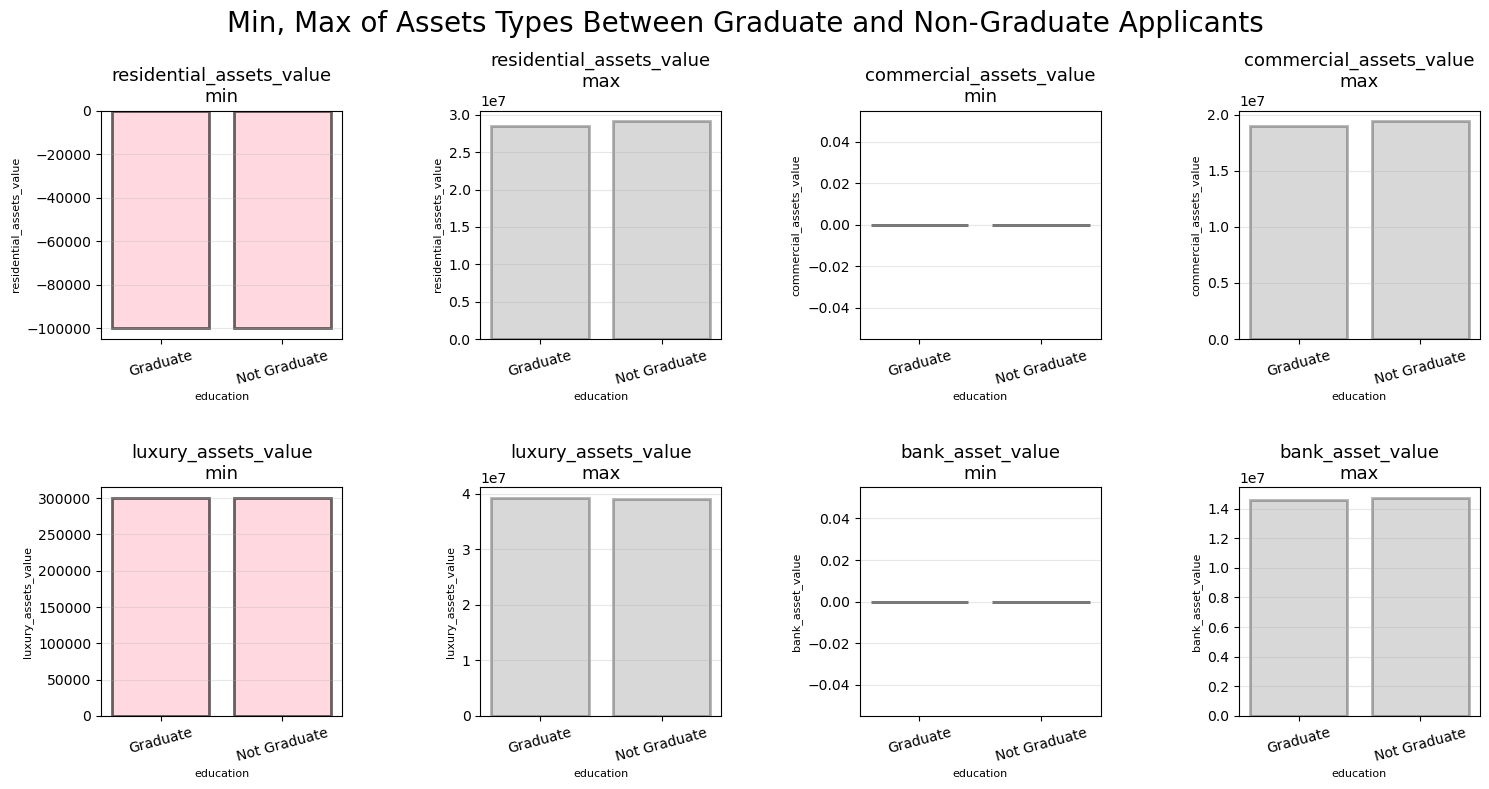

In [31]:
count=1
plt.figure(figsize=(15,8))
plt.suptitle("Min, Max of Assets Types Between Graduate and Non-Graduate Applicants",fontsize=20)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_education['education'],df_min_max_assets_education[col]['min'],color='pink',alpha=0.6,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('education',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_education['education'],df_min_max_assets_education[col]['max'],color='gray',alpha=0.3,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('education',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()

#### 1. Residential Assets Value 

- Minimum :- The **minimum residential asset value is highly negative (around –100,000) for both Graduate and Non-Graduate applicants** → this indicates incorrect or erroneous data, because asset values should not be negative.

- Maximum :- The maximum residential asset value is around 3 crore for both groups → both Graduate and Non-Graduate applicants show similarly high upper-end property values.

#### 2. Commercial asset value

- Minimum :- Minimum commercial asset value is 0 → no negative values here (good).

- Maximum :- Maximum is around 2 crore for both education groups → shows similar high-end commercial holdings.

#### 3. Luxury Assets Value

- Minimum :- Minimum luxury asset value is around 3 lakh → no negative minimum, so the data looks clean.

- Maximum :- Maximum luxury value is around 4 crore → Non-Graduate and Graduate applicants again show similar upper limits.

#### 4. Bank Assets Value

- Minimum :- Both Graduates and Non-Graduates have the same minimum bank_asset_value of 0.

- maximum :- The maximum bank_asset_value is almost the same for both Graduates and Non-Graduates, around 15 million.

### 5.4 Comparison of Asset Types Between Employed and Non-Employed Applicants

### 5.4.1 Count of Asset Types Between Employed and Non-Employed Applicants

In [32]:
df_total_assets_employed = df.groupby('self_employed')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].sum().reset_index()
df_total_assets_employed

,self_employed,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,No,15749200000,10706700000,31966900000,10547100000
1,Yes,16151400000,10523700000,32607300000,10698400000


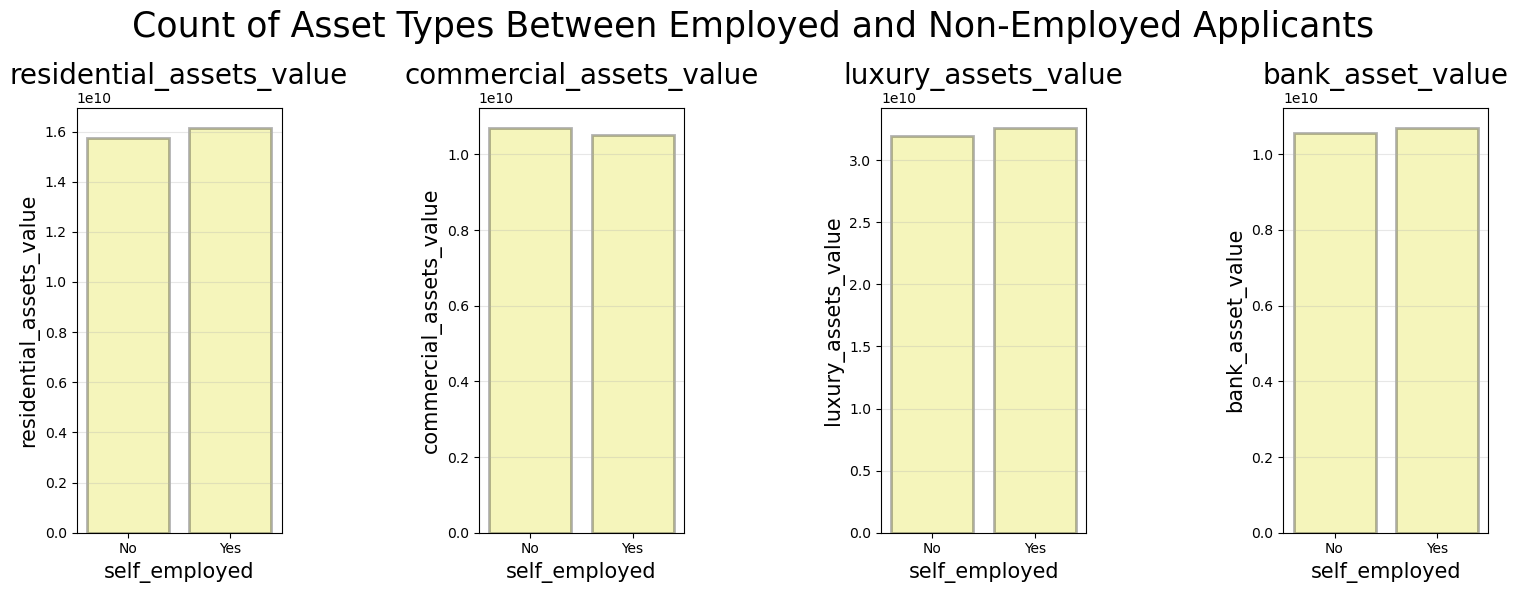

In [33]:
count=1
plt.figure(figsize=(15,6))
plt.suptitle("Count of Asset Types Between Employed and Non-Employed Applicants",fontsize=25)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(1,4,count)
    sns.barplot(x='self_employed',y=col,data=df_total_assets_employed,color='yellow',alpha=0.3,edgecolor='black',linewidth=2)
    plt.title(f"{col}",fontsize=20)
    plt.xlabel('self_employed',fontsize=15)
    plt.ylabel(f'{col}',fontsize=15)
    plt.grid(axis='y',alpha=0.3)
    count+=1
plt.tight_layout(w_pad=10)
plt.show()

- Employed and non-employed applicants show almost the same residential, commercial, and luxury asset values, indicating no meaningful asset difference based on employment status.

### 5.4.2 Min, Max of Asset Types Between Employed and Non-Employed Applicants

In [34]:
df_min_max_assets_employed = df.groupby('self_employed')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].agg(['min','max']).reset_index()
df_min_max_assets_employed

self_employed residential_assets_value           commercial_assets_value  \
                                     min       max                     min   
0            No                  -100000  29100000                       0   
1           Yes                  -100000  28500000                       0   

            luxury_assets_value           bank_asset_value            
        max                 min       max              min       max  
0  19400000              300000  39200000                0  14700000  
1  19000000              300000  38600000                0  14600000

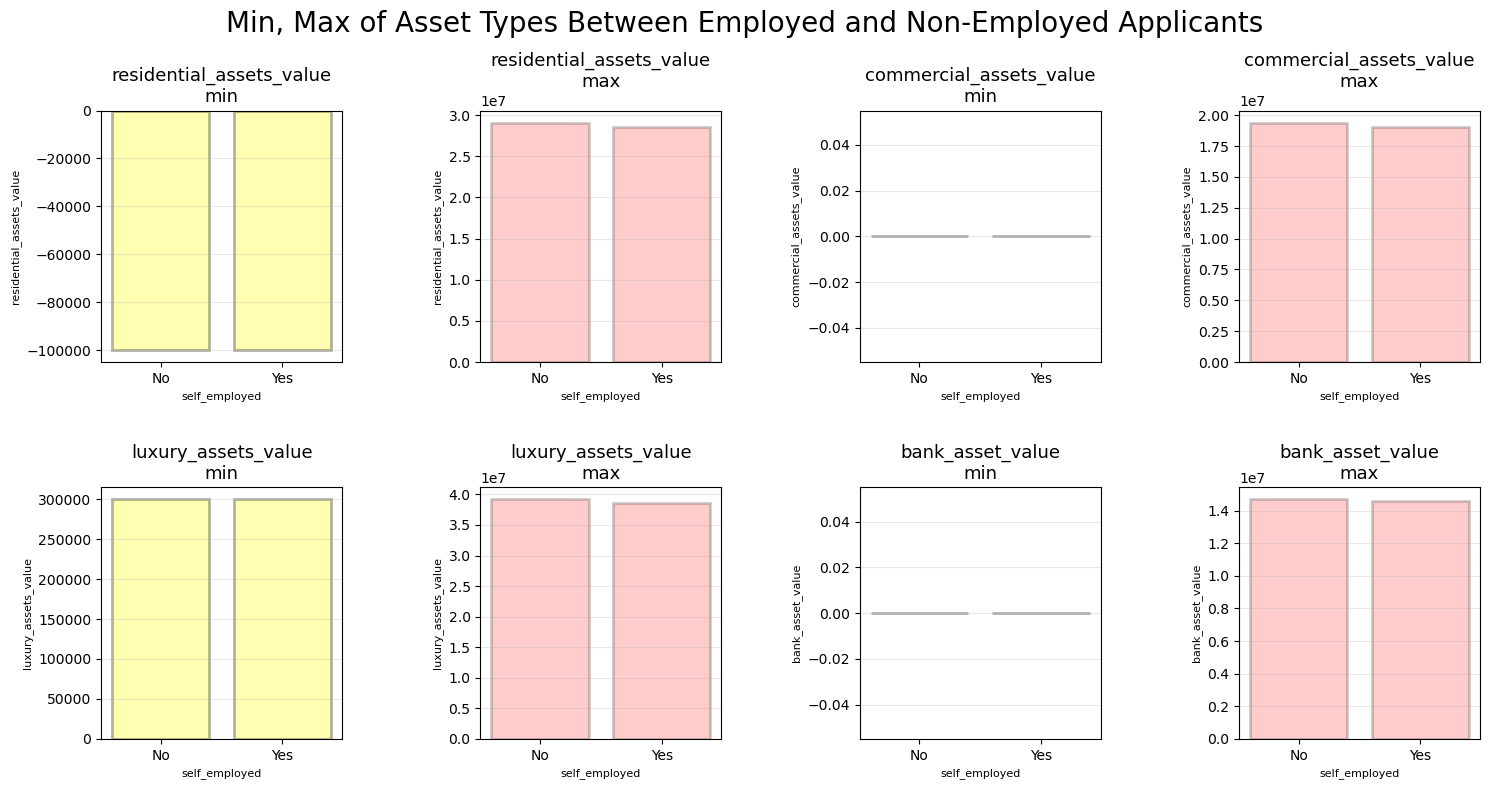

In [35]:
count=1
plt.figure(figsize=(15,8))
plt.suptitle("Min, Max of Asset Types Between Employed and Non-Employed Applicants",fontsize=20)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_employed['self_employed'],df_min_max_assets_employed[col]['min'],color='yellow',alpha=0.3,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('self_employed',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    count+=1
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_employed['self_employed'],df_min_max_assets_employed[col]['max'],color='red',alpha=0.2,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('self_employed',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()

#### 1. Residential Assets 

- Minimum :- Both groups have highly ***negative minimum values***, indicating data errors, since residential asset values cannot be negative.

- Maximum :- Maximum residential asset values (~3 Crore) are almost the same for both groups → self-employment status does not influence the upper limit of property ownership.

#### 2. Commercial Assets 

- Minimum :- Minimum commercial assets are 0 for both → no negative data, values are valid.

-  Maximum :- Maximum commercial assets (~2 Crore) are similar across both groups → no major difference between employed and self-employed applicants.

#### 3. Luxury Assets

- Minimum :- Minimum luxury assets (~3 Lakhs) are identical for both → consistent data.

- Maximum :- Luxury asset maximum (~4 Crore) is also very similar → self-employment has no major impact on luxury holdings.

#### 4. Bank Assets Value

- Minimum :- Both Graduates and Non-Graduates have the same minimum bank_asset_value of 0.

- maximum :- The maximum bank_asset_value is almost the same for both Graduates and Non-Graduates, around 15 million.

### 5.5 Comparison of Asset Types Between Approved and Rejected Applicants

### 5.5.1 Count of Asset Types Between Approved and Rejected Applicants

In [36]:
df_total_assets_status = df.groupby('loan_status')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].sum().reset_index()
df_total_assets_status

,loan_status,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,Approved,19653900000,13283600000,39884100000,13172500000
1,Rejected,12246700000,7946800000,24690100000,8073000000


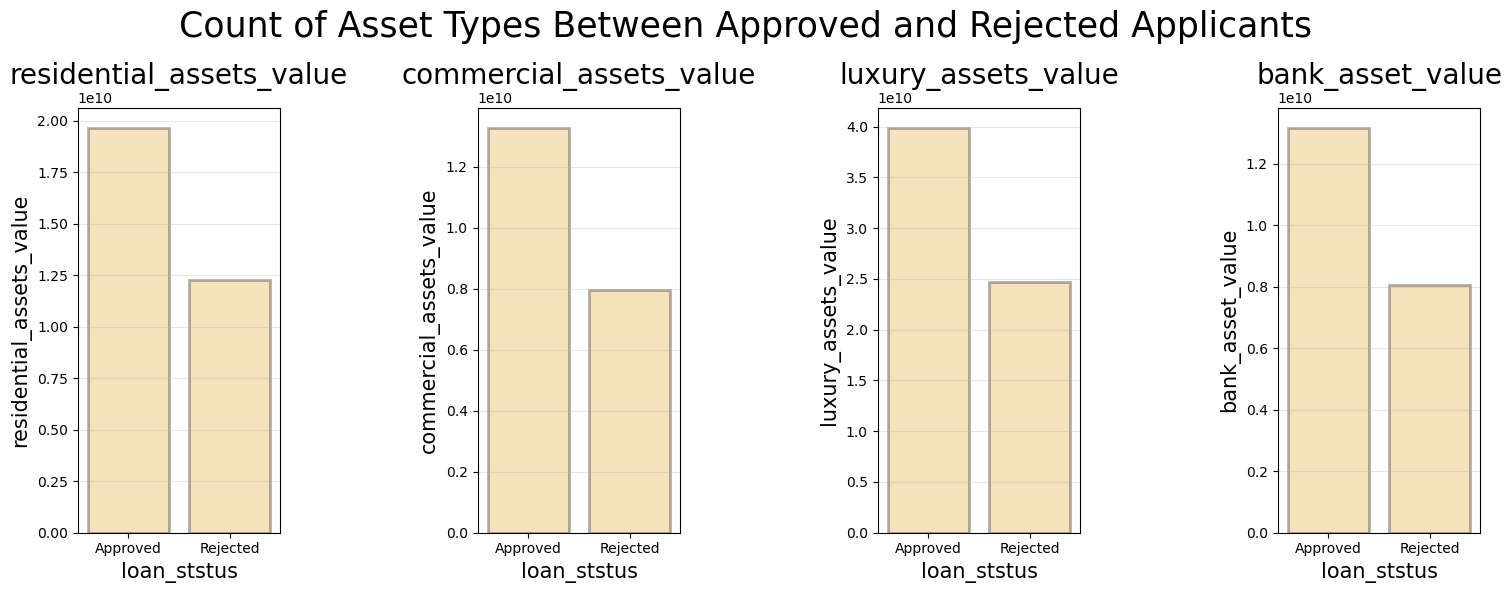

In [37]:
count=1
plt.figure(figsize=(15,6))
plt.suptitle("Count of Asset Types Between Approved and Rejected Applicants",fontsize=25)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(1,4,count)
    sns.barplot(x='loan_status',y=col,data=df_total_assets_status,color='orange',alpha=0.3,edgecolor='black',linewidth=2)
    plt.title(f"{col}",fontsize=20)
    plt.xlabel('loan_ststus',fontsize=15)
    plt.ylabel(f'{col}',fontsize=15)
    plt.grid(axis='y',alpha=0.3)
    count+=1
plt.tight_layout(w_pad=10)
plt.show()

- Applicants with ***higher residential, commercial, and luxury asset values are far more likely to get their loans approved, while lower asset holders face higher rejection rates***.

### 5.5.2 Min, Max of Asset Types Between Approved and Rejected Applicants

In [38]:
df_min_max_assets_status = df.groupby('loan_status')[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].agg(['min','max']).reset_index()
df_min_max_assets_status

loan_status residential_assets_value           commercial_assets_value  \
                                   min       max                     min   
0    Approved                  -100000  29100000                       0   
1    Rejected                  -100000  28700000                       0   

            luxury_assets_value           bank_asset_value            
        max                 min       max              min       max  
0  19400000              300000  38600000                0  14700000  
1  18800000              300000  39200000                0  14700000

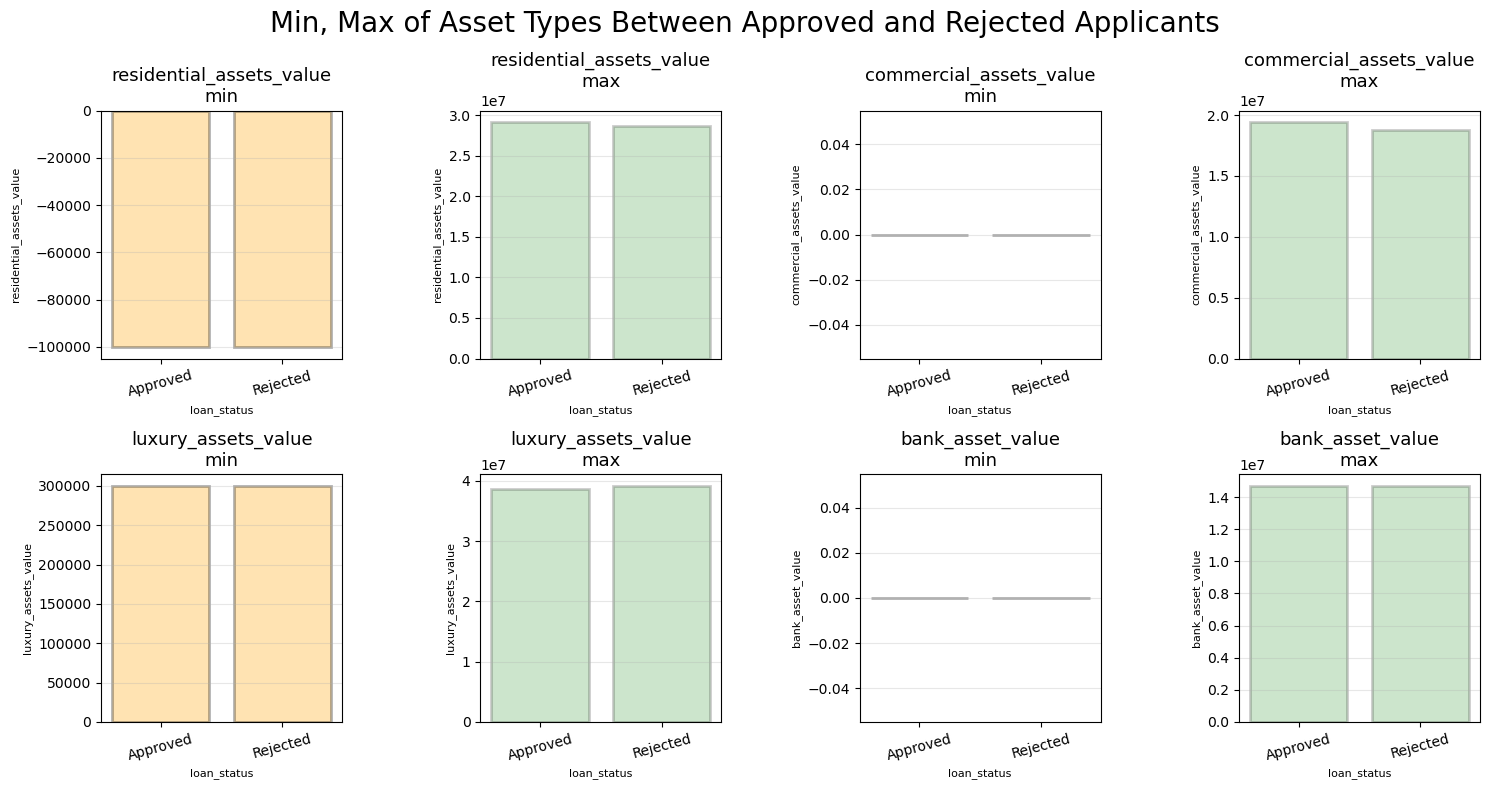

In [39]:
count=1
plt.figure(figsize=(15,8))
plt.suptitle("Min, Max of Asset Types Between Approved and Rejected Applicants",fontsize=20)
for col in ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_status['loan_status'],df_min_max_assets_status[col]['min'],color='orange',alpha=0.3,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('loan_status',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
    plt.subplot(2,4,count)
    plt.bar(df_min_max_assets_status['loan_status'],df_min_max_assets_status[col]['max'],color='green',alpha=0.2,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('loan_status',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

#### 1. Residential_assets_value

- Min: Both approved and rejected applicants show negative residential asset values, indicating data entry errors or liabilities recorded as assets.

- Max: Approved and rejected groups have similar very high residential asset values, showing no major difference.

#### 2. Commercial_assets_value

- Min: Minimum commercial asset values are 0 for both groups, meaning many applicants own no commercial assets.

- Max: Maximum values are almost equal, suggesting commercial assets do not differentiate approval.

#### 3. Luxury_assets_value

- Min: Minimum luxury asset values are similar, indicating no advantage in the lower range.

- Max: Maximum luxury assets are almost identical across approval status, showing little influence on decisions.

#### 4. Bank Assets Value

- Minimum :- Both Graduates and Non-Graduates have the same minimum bank_asset_value of 0.

- maximum :- The maximum bank_asset_value is almost the same for both Graduates and Non-Graduates, around 15 million.

In [40]:
df.sample(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1034,0,Graduate,No,9400000,33000000,4,616,15400000,5000000,25100000,7800000,Approved
150,1,Not Graduate,Yes,5200000,19300000,8,481,14300000,9500000,18800000,4200000,Rejected
609,4,Not Graduate,No,8300000,17900000,20,846,12700000,1300000,26800000,12200000,Approved
3227,0,Not Graduate,No,2500000,7100000,10,590,4000000,800000,6100000,2600000,Approved
3652,4,Not Graduate,Yes,8400000,19700000,14,889,22400000,5800000,22000000,12100000,Approved


### 5.6 Comparison of Income, Loan Amount and Cibil Score Between Graduate and Not Graduate Applicants

In [41]:
df_min_max_education = df.groupby(['education'])[['income_annum','loan_amount','cibil_score']].agg(['min','max']).reset_index()
df_min_max_education

education income_annum          loan_amount           cibil_score     
                         min      max         min       max         min  max
0      Graduate       200000  9900000      300000  39500000         300  900
1  Not Graduate       200000  9900000      300000  38700000         300  900

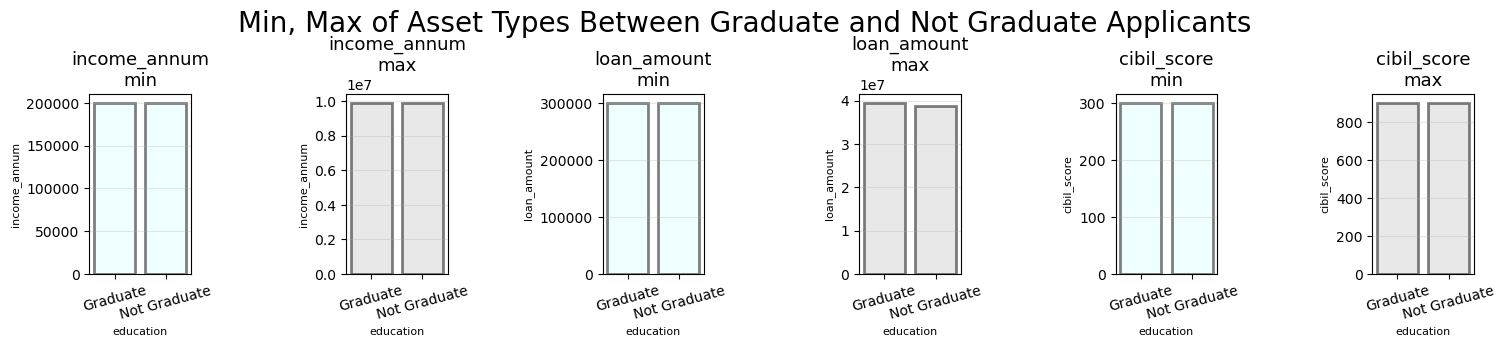

In [42]:
count=1
plt.figure(figsize=(15,16))
plt.suptitle("Min, Max of Asset Types Between Graduate and Not Graduate Applicants",fontsize=20)
for col in ['income_annum','loan_amount','cibil_score']:
    plt.subplot(6,6,count)
    plt.bar(df_min_max_education['education'],df_min_max_education[col]['min'],color='lightcyan',alpha=0.5,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('education',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
    plt.subplot(6,6,count)
    plt.bar(df_min_max_education['education'],df_min_max_education[col]['max'],color='lightgray',alpha=0.5,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('education',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

- Graduates and non-graduates show almost identical minimum and maximum values across income, loan amount, and CIBIL score,  
  indicating ***education level does not significantly impact these extremes***.

### 5.7 Comparison of Income, Loan Amount and Cibil Score Between Employed and Not Employed Applicants

In [43]:
df_min_max_employed = df.groupby(['self_employed'])[['income_annum','loan_amount','cibil_score']].agg(['min','max']).reset_index()
df_min_max_employed

self_employed income_annum          loan_amount           cibil_score     
                         min      max         min       max         min  max
0            No       200000  9900000      300000  38800000         300  898
1           Yes       200000  9900000      300000  39500000         300  900

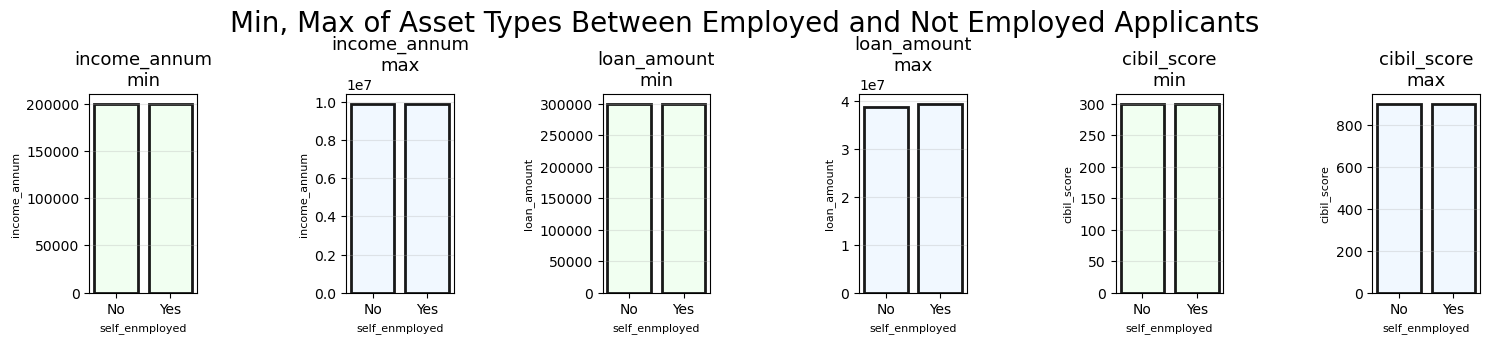

In [44]:
count=1
plt.figure(figsize=(15,16))
plt.suptitle("Min, Max of Asset Types Between Employed and Not Employed Applicants",fontsize=20)
for col in ['income_annum','loan_amount','cibil_score']:
    plt.subplot(6,6,count)
    plt.bar(df_min_max_employed['self_employed'],df_min_max_employed[col]['min'],color='honeydew',alpha=0.9,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('self_enmployed',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    count+=1
    plt.subplot(6,6,count)
    plt.bar(df_min_max_employed['self_employed'],df_min_max_employed[col]['max'],color='aliceblue',alpha=0.9,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('self_enmployed',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

- Employed and self-employed applicants have almost identical minimum and maximum values for income, loan amount, and CIBIL score,   
  showing ***employment type does not influence these extremes***.

### 5.8 Comparison of Income, Loan Amount and Cibil Score Between Approved and Rejected Applicants

In [45]:
df_min_max_status = df.groupby(['loan_status'])[['income_annum','loan_amount','cibil_score']].agg(['min','max']).reset_index()
df_min_max_status

loan_status income_annum          loan_amount           cibil_score     
                       min      max         min       max         min  max
0    Approved       200000  9900000      300000  39500000         300  900
1    Rejected       200000  9900000      300000  38200000         300  885

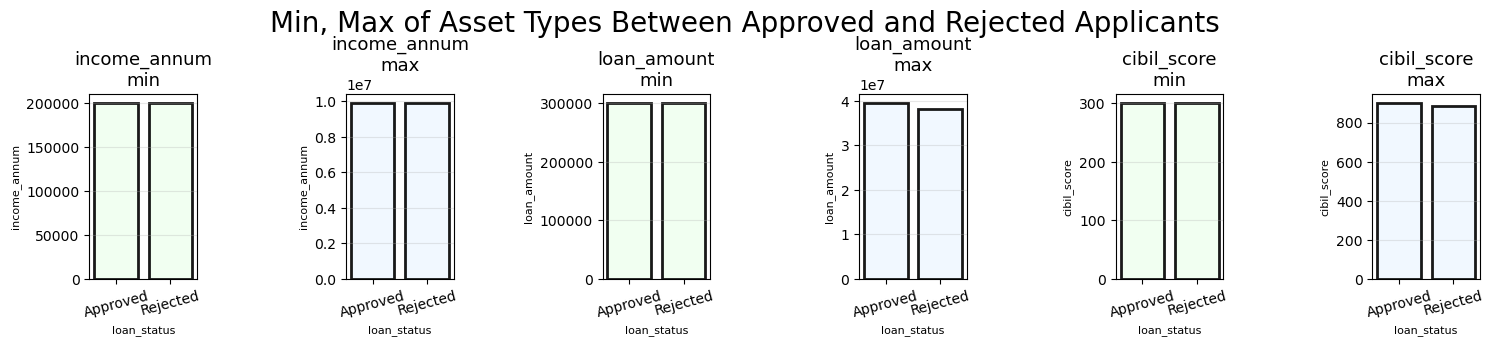

In [46]:
count=1
plt.figure(figsize=(15,16))
plt.suptitle("Min, Max of Asset Types Between Approved and Rejected Applicants",fontsize=20)
for col in ['income_annum','loan_amount','cibil_score']:
    plt.subplot(6,6,count)
    plt.bar(df_min_max_status['loan_status'],df_min_max_status[col]['min'],color='honeydew',alpha=0.9,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmin",fontsize=13)
    plt.xlabel('loan_status',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
    plt.subplot(6,6,count)
    plt.bar(df_min_max_status['loan_status'],df_min_max_status[col]['max'],color='aliceblue',alpha=0.9,edgecolor='black',linewidth=2)
    plt.title(f"{col}\nmax",fontsize=13)
    plt.xlabel('loan_status',fontsize=8)
    plt.ylabel(f'{col}',fontsize=8)
    plt.grid(axis='y',alpha=0.3)
    plt.xticks(rotation=15)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

- Approved and rejected applicants have almost identical minimum and maximum values for income, loan amount, and CIBIL score,    
  indicating ***loan approval is not influenced by the extreme ranges of these financial features***.

## 6. Multivariate Analysis

In [47]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### 6.1 Create a Heatmap for Correlation Analysis of Financial and Asset Variables

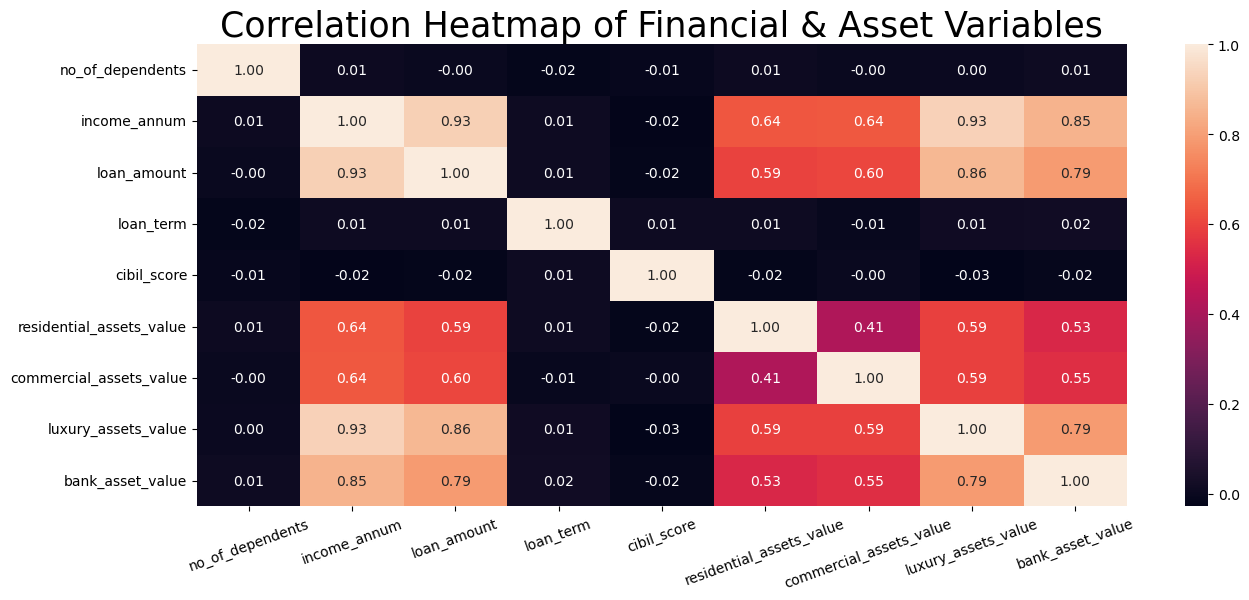

In [48]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Financial & Asset Variables",fontsize=25)
plt.xticks(rotation=20)
plt.show()

- Income, loan amount, and all asset values are strongly interconnected,   
  showing that financially stronger applicants hold multiple asset types and take higher loans.

- Meanwhile, CIBIL score, loan term, and number of dependents show almost no correlation with any financial variable,   
  indicating they behave independently in this dataset.

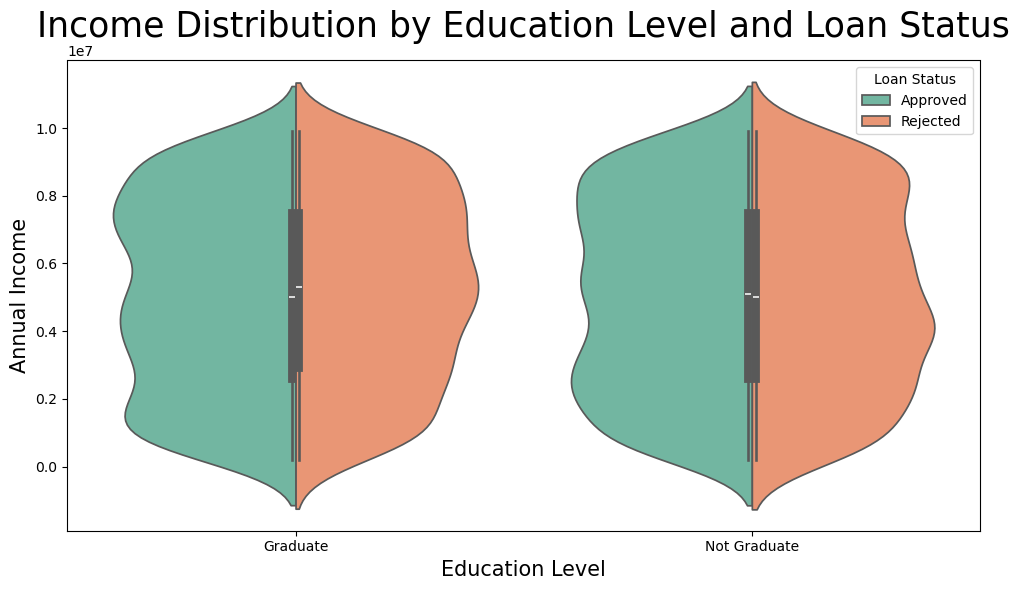

In [49]:
plt.figure(figsize=(10,6))
sns.violinplot(x='education',y='income_annum',hue='loan_status',data=df,split=True,palette='Set2')
plt.title('Income Distribution by Education Level and Loan Status', fontsize=25)
plt.xlabel('Education Level',fontsize=15)
plt.ylabel('Annual Income',fontsize=15)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

- Both graduates and non-graduates show almost identical income distributions for approved and rejected loans,     
  indicating that education level and income do not significantly influence loan approval decisions in this dataset.